In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict




In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])


In [83]:
def replace_outliers(X, alpha):
    num_features = X.shape[1]
    q_low = X.quantile(alpha, axis=0)
    q_up = X.quantile(1 - alpha, axis=0)
    X_new = X.values.copy()
    for i in range(num_features):
        median = X[i].median()
        for j in range(X.shape[0]):
            if X_new[j][i] < q_low[i] or X_new[j][i] > q_up[i]:
                X_new[j][i] = np.random.normal(loc=median,)
    return X_new

In [85]:
X = replace_outliers(pd.DataFrame(X), 0.05)

(1500,)


In [55]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_10_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_10_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_10_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 1500)
(1000,)
(10000, 1500)


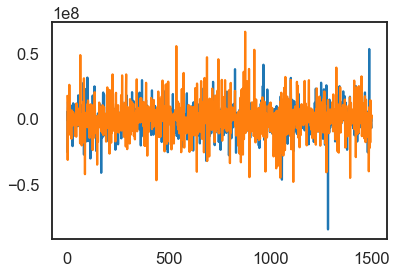

In [7]:
plt.plot(np.mean(X_train_load[np.where(y_train_load==0)], axis = 0))
plt.plot(np.mean(X_train_load[np.where(y_train_load==1)], axis = 0))

In [8]:
# for i in range(X_train_load.shape[1]):
#     print(anderson(X_train_load[np.where(y_train_load==1)][:,i])[0], anderson(X_train_load[np.where(y_train_load==0)][:,i])[0])
    

In [9]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function mutual_info_classif at 0x114bb5b70>)

In [10]:
np.sort(skb.scores_)[::-1][:20]

array([ 0.0556297 ,  0.0536367 ,  0.04260926,  0.04195414,  0.04152506,
        0.04053243,  0.0400291 ,  0.03828705,  0.03754385,  0.03719705,
        0.03648461,  0.035109  ,  0.03482679,  0.03473152,  0.03417612,
        0.03347021,  0.03323387,  0.03303886,  0.03199884,  0.03188425])

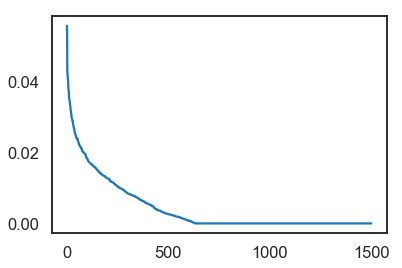

In [86]:
plt.plot(np.sort(skb.scores_)[::-1])

In [71]:
skb.k = 1500

In [72]:
# X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)



In [73]:
X_train = replace_outliers(pd.DataFrame(X_train), 0.05)

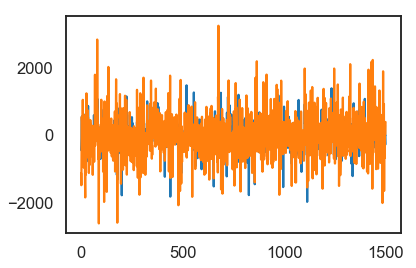

In [74]:
plt.plot(np.mean(X_train[np.where(y_train==0)], axis = 0))
plt.plot(np.mean(X_train[np.where(y_train==1)], axis = 0))

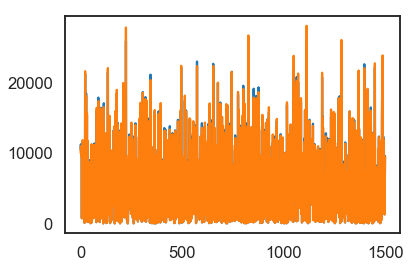

In [75]:
plt.plot(np.std(X_train[np.where(y_train==0)], axis = 0))
plt.plot(np.std(X_train[np.where(y_train==1)], axis = 0))

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 1500)
(1000,)
(10000, 1500)


In [78]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-6180 -1000
382


In [79]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = naive_bayes.GaussianNB(priors=[rho,1-rho]).fit(X_train, y_train).predict(X_test)
Predict_For_NUM = naive_bayes.GaussianNB(priors=[rho,1-rho]).fit(X_train, y_train).predict(X_test)





ACC 0.516
AUC 0.514118334774
NUM 484
ASY1 422
ASY2 290


In [80]:
rho = 0.99
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = naive_bayes.GaussianNB(priors=[rho,1-rho]).fit(X_train, y_train).predict(X_test)




ACC 0.516
AUC 0.514118334774
NUM 484
ASY1 156
ASY2 276


In [16]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = naive_bayes.GaussianNB(priors=[rho,1-rho]).fit(X_train, y_train).predict(X_test)




ACC: 0.507571918324 0.0959424351984
AUC: 0.80100570057 0.0254055611371
NUM: 19.9 2.54754784057
ASY1: -724.0 27.0887430495
ASY2: -57.3 6.16522505672
